Jumlah Data: 569
Jumlah Fitur: 30
Contoh Label: [0 1]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6116 - loss: 0.5898 - val_accuracy: 0.6579 - val_loss: 0.4849
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6423 - loss: 0.4778 - val_accuracy: 0.7281 - val_loss: 0.4009
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7053 - loss: 0.4221 - val_accuracy: 0.8684 - val_loss: 0.3531
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7994 - loss: 0.3948 - val_accuracy: 0.9123 - val_loss: 0.3270
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8464 - loss: 0.3709 - val_accuracy: 0.9386 - val_loss: 0.3079
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8805 - loss: 0.3624 - val_accuracy: 0.9386 - val_loss: 0.2954
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9176 - loss: 0.3324 - val_accuracy: 0.9649 - val_loss: 0.2833
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9343 - loss: 0.3449 - val_accuracy: 0.9737 - val_loss

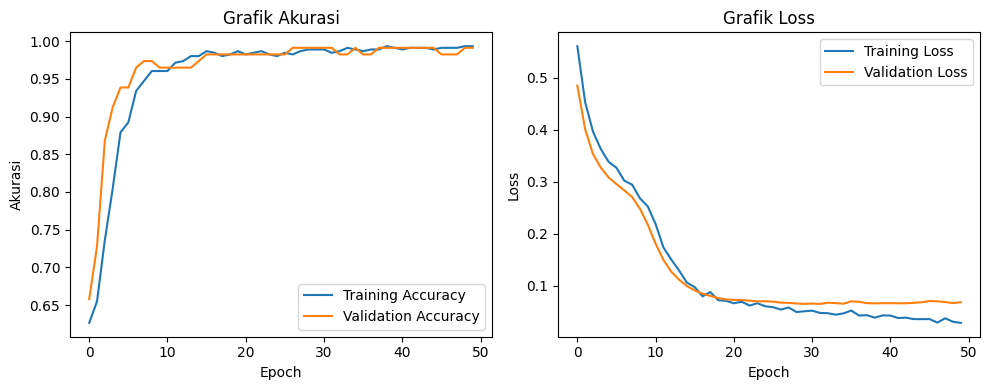

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step

🔍 Contoh Prediksi:
Data ke-1 | Prediksi: 1 | Label Asli: 1
Data ke-2 | Prediksi: 0 | Label Asli: 0
Data ke-3 | Prediksi: 0 | Label Asli: 0
Data ke-4 | Prediksi: 1 | Label Asli: 1
Data ke-5 | Prediksi: 1 | Label Asli: 1


/tmp/ipython-input-4248971563.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Data ke-{i+1} | Prediksi: {int(pred[i]>0.5)} | Label Asli: {y_test[i]}")


In [1]:

# 1️⃣ Import Library
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import set_random_seed

# 2️⃣ Set random seed (agar hasil stabil)
set_random_seed(42)

# 3️⃣ Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Jumlah Data:", X.shape[0])
print("Jumlah Fitur:", X.shape[1])
print("Contoh Label:", np.unique(y))

# 4️⃣ Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 6️⃣ Membangun Model Sequential
model = Sequential([
    Dense(16, activation='relu', input_dim=X.shape[1]),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output biner (0 atau 1)
])

# 7️⃣ Kompilasi model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 8️⃣ Training Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

# 9️⃣ Evaluasi Model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🎯 Akurasi Training Terakhir: {history.history['accuracy'][-1]*100:.2f}%")
print(f"🎯 Akurasi Validation Terakhir: {history.history['val_accuracy'][-1]*100:.2f}%")

# 10️⃣ Visualisasi hasil training
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Grafik Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Grafik Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 11️⃣ Prediksi contoh data
pred = model.predict(X_test[:5])
print("\n🔍 Contoh Prediksi:")
for i in range(5):
    print(f"Data ke-{i+1} | Prediksi: {int(pred[i]>0.5)} | Label Asli: {y_test[i]}")
